<a href="https://colab.research.google.com/github/rakesh1188/Weather-Modelling/blob/main/Weather_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

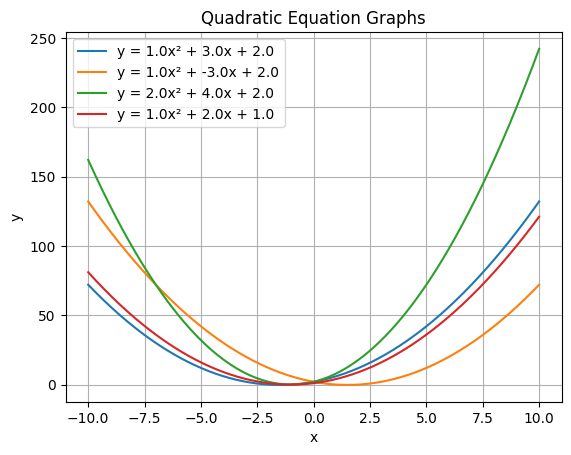

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def solve_quadratic(a, b, c, x):
    return a * x**2 + b * x + c

def get_input_from_user():
    a = float(input("Enter coefficient a: "))
    b = float(input("Enter coefficient b: "))
    c = float(input("Enter coefficient c: "))
    x = float(input("Enter the value of x: "))
    return a, b, c, x

def read_from_file(filename):
    inputs = []
    try:
        with open(filename, 'r') as file:
            for line_number, line in enumerate(file.readlines(), start=1):
                values = line.strip().split()
                if len(values) != 4:
                    print(f"Warning: Line {line_number} in '{filename}' has {len(values)} values instead of 4. Skipping this line.")
                    continue
                try:
                    a, b, c, x = map(float, values)
                    inputs.append((a, b, c, x))
                except ValueError:
                    print(f"Warning: Line {line_number} in '{filename}' contains non-numeric values. Skipping this line.")
        return inputs
    except FileNotFoundError:
        print(f"Error: The file '{filename}' was not found. Please make sure it exists and the path is correct.")
        return []

def solve_multiple_sets(inputs):
    results = []
    for a, b, c, x in inputs:
        result = solve_quadratic(a, b, c, x)
        results.append((a, b, c, x, result))
    return results

def plot_graph(results):
    x_vals = np.linspace(-10, 10, 400)
    for a, b, c, _, _ in results:
        y_vals = a * x_vals**2 + b * x_vals + c
        plt.plot(x_vals, y_vals, label=f"y = {a}x² + {b}x + {c}")

    plt.title("Quadratic Equation Graphs")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    filename_single = "input_single.txt"
    inputs_single = read_from_file(filename_single)
    results_single = solve_multiple_sets(inputs_single)
    filename_multiple = "input_multiple.txt"
    inputs_multiple = read_from_file(filename_multiple)
    results_multiple = solve_multiple_sets(inputs_multiple)
    all_results = results_single + results_multiple
    plot_graph(all_results)

if __name__ == "__main__":
    main()